In [45]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup
music_list = []
df1= pd.DataFrame()
for year in range(1960,2006):
    if year != 1970:
        df_list = pd.read_html("https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_"+ str(year), header=0)
        df4= df_list[0]

        df4["Year"] = year
        if "№" in df4.columns:
            del df4["№"]
        if "No." in df4.columns:
            del df4["No."]
#         df4["Title"]=  df4["Title"].apply(lambda x: json.loads(x))
     
        for index, row in df4.iterrows():
            try:
                row["Title"]=  json.loads(row["Title"])
            except:
                pass
            music_list.append(row.values.tolist())

# For 2006 to 2017
import requests
from bs4 import BeautifulSoup
for year in range(2006,2018):
    url = "https://www.billboard.com/charts/year-end/"+ str(year)+"/hot-100-songs"
    response = requests.get(url)
    results_page = BeautifulSoup(response.content,'lxml')
    # print(results_page.prettify())
    article_tags = results_page.find_all('article', class_= "ye-chart-item")
    for tag in article_tags:
        artist =tag.find('div', class_= "ye-chart-item__artist").get_text().strip()
        track  = tag.find('div', class_= "ye-chart-item__title").get_text().strip()
        music_list.append([track,artist, year])


In [ ]:
import pandas as pd
import json
music_list_1970=[]
df_list = pd.read_html("https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_"+ str(1970), header=0)
df4= df_list[1]
del df4["No."]

df4["Title"]=  df4["Title"].apply(lambda x: json.loads(x))

for index, row in df4.iterrows():
    music_list_1970.append(row.values.tolist())

popularity_1970 =[]
for i in range(0,len(music_list_1970)):
    try:
        year =1970
        track = music_list_1970[i][0]
        artist= music_list_1970[i][1]
        song_popularity, artist_popularity= get_popularity(track, artist)
        popularity_1970.append((track, song_popularity, artist_popularity))
    except:
        pass

audio_features_1970 = []
for i in range(0,len(music_list_1970)):
    try:
        year =1970
        track = music_list_1970[i][0]
        artist= music_list_1970[i][1]
   
        danceability, energy, key, loudness, mode,speechiness,acousticness, instrumentalness, liveness, valence, tempo, type_, id_,uri, track_href,analysis_url,duration_ms, time_signature = get_spotify_features(track, artist)
        audio_features_1970.append((year,artist,track,danceability, energy, key, loudness, mode, speechiness,acousticness, instrumentalness, liveness, valence, tempo,duration_ms, time_signature))
    except:
        pass

import pandas as pd
labels = ["Year", "Artist", "Track", "Danceability","Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness",
          "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms", "Time_Signature"]
audio_features1970 =pd.DataFrame(audio_features_1970, columns=labels)
# df.head(50)

audio_features1970.to_excel("audio_features_1970.xlsx")

import pandas as pd
labels = ["Track", "Track_Popularity", "Artist_Popularity"]
df_pop_1970 =pd.DataFrame(popularity_1970, columns=labels)
df_pop_1970.to_excel("df_pop_1970.xlsx")

In [ ]:
# df = pd.DataFrame(music_list)
# df.tail(50)
len(music_list)

In [ ]:
#for 2018
import requests
from bs4 import BeautifulSoup
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
results_page = BeautifulSoup(response.content,'lxml')
# print(results_page.prettify())
div_tags = results_page.find_all('div', class_= "chart-list-item")
for div in div_tags:
    artist= div.get("data-artist")
    track = div.get("data-title")
        

In [ ]:
# !pip3 install spotipy


In [ ]:

def get_spotify_features(track, artist):
    import spotipy
    import numpy as np
    from spotipy.oauth2 import SpotifyClientCredentials
    client_credentials_manager = SpotifyClientCredentials(client_id="a31e2c1446fd4e6aa11476d8532fc939",client_secret="b52f884f9d4f464eba58daf0d5180ea4")
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    from collections import OrderedDict
    #Search for Spofity song ID 
    songs=sp.search(q='track:'+track+' '+'artist:'+artist+'*' , type='track')
    items = songs['tracks']['items']
#     print(items)
    if len(items) ==0:
        return([0]*18)
    else:
        track = items[0]
        song_id = str(track["id"])
        #Use ID to get Song features
        track_features=sp.audio_features(song_id)
        if len(track_features[0]) <18:
            return([0]*18)
        else:
            features = np.array(track_features)[0]
            #Order Dictionary
#           print(len(track_features[0]))
            features = OrderedDict(features)
#             return (features)
            #Get Dictionary values
            return(features.values())
 ## get_spotify_features("Sicko Mode", "Travis Scott")    


In [ ]:
audio_features = []
for i in range(0,len(music_list)):
    print(i)
    try:
        year = music_list[i][2]
        track = music_list[i][0]
        artist= music_list[i][1]
        get_spotify_features(track,artist)
        
        danceability, energy, key, loudness, mode,speechiness,acousticness, instrumentalness, liveness, valence, tempo, type_, id_,uri, track_href,analysis_url,duration_ms, time_signature = get_spotify_features(track, artist)
        audio_features.append((year,artist,track,danceability, energy, key, loudness, mode, speechiness,acousticness, instrumentalness, liveness, valence, tempo,duration_ms, time_signature))
    except:
        pass

In [ ]:
import pandas as pd
labels = ["Year", "Artist", "Track", "Danceability","Energy", "Key", "Loudness", "Mode", "Speechiness", "Acousticness",
          "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms", "Time_Signature"]
df =pd.DataFrame(audio_features, columns=labels)
df.head(50)

In [ ]:
df.to_excel("spotify_project_final.xlsx")
df.to_csv("spotify_project_final.csv", sep='\t')


In [40]:

def get_popularity(track, artist):
    import spotipy
    import numpy as np
    from spotipy.oauth2 import SpotifyClientCredentials
    client_credentials_manager = SpotifyClientCredentials(client_id="a31e2c1446fd4e6aa11476d8532fc939",client_secret="b52f884f9d4f464eba58daf0d5180ea4")
    from collections import OrderedDict

    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    artists=sp.search('artist:'+artist+'*' , type='artist')
    try:
        artist_popularity = artists['artists']['items'][0]['popularity']
    except:
        artist_popularity = 0
        
    songs=sp.search(q='track:'+track+' '+'artist:'+artist+'*' , type='track')
    items = songs['tracks']['items']
    if len(items) ==0:
        return([0]*18)
        song_popularity = 0
    else:
        track = items[0]
#         print(track)
        song_id = str(track["id"])
        song_popularity = track['popularity']
    return (song_popularity, artist_popularity)

# popularity=[]
# for i in range(0,len(music_list)):
#     try:
#         year = music_list[i][2]
#         track = music_list[i][0]
#         artist= music_list[i][1]
#      
#         song_popularity, artist_popularity= get_popularity(track, artist)
#         popularity.append((track, song_popularity, artist_popularity))
#     except:
#         pass
# get_popularity("Sicko Mode", "Travis Scott") 

['pop', 'pop rap', 'rap']


(96, 96)

In [47]:
def get_genre(artist):
    import spotipy
    import numpy as np
    from spotipy.oauth2 import SpotifyClientCredentials
    client_credentials_manager = SpotifyClientCredentials(client_id="a31e2c1446fd4e6aa11476d8532fc939",client_secret="b52f884f9d4f464eba58daf0d5180ea4")
    from collections import OrderedDict

    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    artists=sp.search('artist:'+artist+'*' , type='artist')

    try:
        artist_genre= artists['artists']['items'][0]['genres']
    except:
        artist_genre = 0
    return artist_genre
artist_genre_list=[]
for i in range(0,len(music_list)):
    try:
       
        artist= music_list[i][1]
     
        artist_genre= get_genre(artist)
        artist_genre_list.append((artist,artist_genre))
    except:
        pass
 

In [48]:
# import pandas as pd

# df_genre = pd.DataFrame(artist_genre_list)
# # df.tail(50)
# df_genre.to_excel("artist_genre.xlsx")

In [1]:
import pandas as pd
data_sp = pd.read_excel("spotify_project_final v2.0.xlsx")
# print(len(data_sp))
data = data_sp[data_sp["Danceability"] !=0]

print(len(data))

4943


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [9]:
# data = pd.read_excel("spotify_project_final.xlsx")

# Create a zeros array to store averages later 
a=np.zeros((14,58))

df = pd.DataFrame(data[data['Year']==1960].mean())
means = pd.DataFrame(a, columns=range(1960,2018))

for year in range(1960,2018):
    df = pd.DataFrame(data[data['Year']==year].mean())
    for i in range(0,16):
        means.ix[i,year]=df.ix[i,0]
means=means.drop([0])

indexxx=df.index.values
newindex = list(filter(lambda x : x != 'Year', indexxx))

means.index=newindex

means

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Danceability,0.551031,0.545704,0.550633,0.549887,0.555489,0.552371,0.562542,0.538677,0.563082,0.549755,...,0.621258,0.629130,0.620567,0.624197,0.646480,0.615523,0.606957,0.647833,0.649889,0.696211
Energy,0.467871,0.474910,0.484974,0.517121,0.568352,0.573124,0.564792,0.531167,0.547804,0.508378,...,0.718015,0.717260,0.730030,0.736970,0.737467,0.708923,0.707174,0.668727,0.627611,0.611456
Key,5.093750,4.857143,5.408163,5.216495,4.922222,4.886598,5.208333,5.375000,4.938144,5.438776,...,5.909091,5.311688,5.417910,5.606061,5.400000,5.169231,5.681159,5.015152,5.825397,5.263158
Loudness,-10.717042,-10.910408,-10.299194,-10.228041,-9.647611,-9.527268,-9.971521,-9.737990,-10.378103,-10.974214,...,-5.298485,-5.239403,-5.023209,-5.308848,-5.195667,-5.578738,-5.464000,-5.870864,-6.353254,-6.514298
Mode,0.854167,0.877551,0.816327,0.865979,0.811111,0.855670,0.812500,0.854167,0.773196,0.714286,...,0.651515,0.701299,0.731343,0.742424,0.640000,0.723077,0.768116,0.681818,0.539683,0.561404
Speechiness,0.044937,0.062063,0.061243,0.055970,0.051287,0.043029,0.047257,0.040638,0.052971,0.047496,...,0.069036,0.073721,0.078148,0.068779,0.074348,0.063337,0.072077,0.075758,0.116467,0.129486
Acousticness,0.654333,0.646010,0.618762,0.573362,0.493947,0.445346,0.365832,0.406446,0.380327,0.355482,...,0.129395,0.140850,0.125109,0.114139,0.119668,0.118021,0.160909,0.167805,0.177620,0.151748
Instrumentalness,0.050696,0.100253,0.089676,0.060225,0.058431,0.048412,0.040888,0.033651,0.097226,0.045004,...,0.006137,0.005651,0.004809,0.027167,0.001374,0.009629,0.023394,0.001310,0.000329,0.004524
Liveness,0.181199,0.239024,0.198166,0.216604,0.196099,0.207451,0.201025,0.191609,0.212205,0.192888,...,0.167023,0.180582,0.184796,0.188921,0.170508,0.180397,0.175120,0.162379,0.152368,0.131142
Valence,0.685437,0.684163,0.669388,0.714928,0.697076,0.679763,0.706990,0.650219,0.661905,0.654010,...,0.504177,0.529104,0.553955,0.544858,0.564440,0.519492,0.505723,0.503591,0.469175,0.496177


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


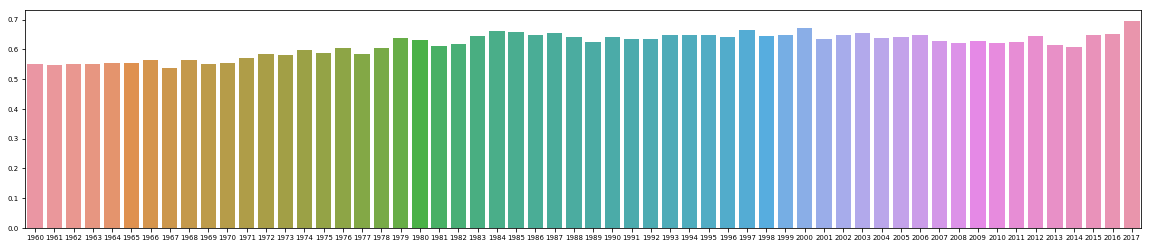

In [10]:
y=list(pd.Series(means.ix['Danceability',:]))
x=list(range(1960,2018))
plt.figure(figsize=(20,4))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5})   

sns.barplot(x,y, ci=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Loudness')

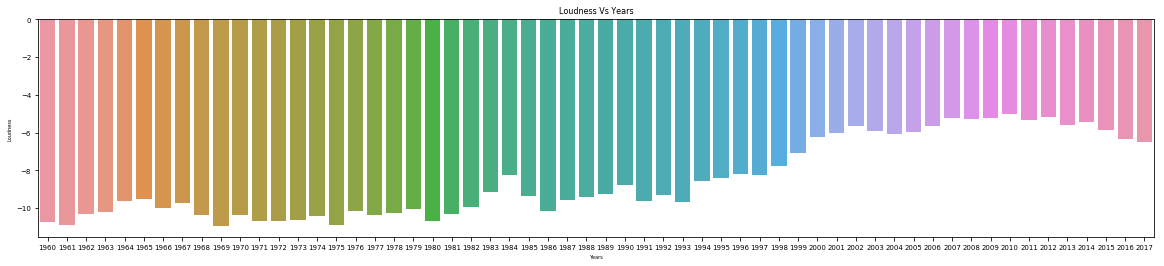

In [11]:
y=list(pd.Series(means.ix['Loudness',:]))
x=list(range(1960,2018))
plt.figure(figsize=(20,4))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5})   
sns.barplot(x,y, ci=1)
plt.title('Loudness Vs Years')
plt.xlabel('Years')
plt.ylabel('Loudness')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Acousticness')

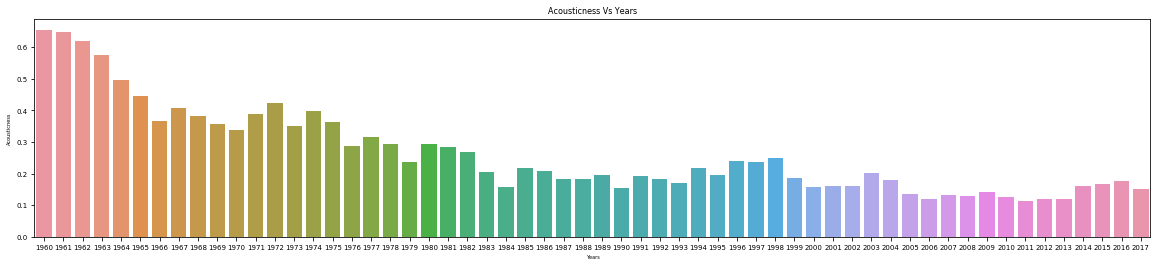

In [12]:
y=list(pd.Series(means.ix['Acousticness',:]))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5}) 
plt.figure(figsize=(20,4))
sns.barplot(x,y, ci=1)
plt.title('Acousticness Vs Years')
plt.xlabel('Years')
plt.ylabel('Acousticness')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Text(0,0.5,'Instrumentalness')

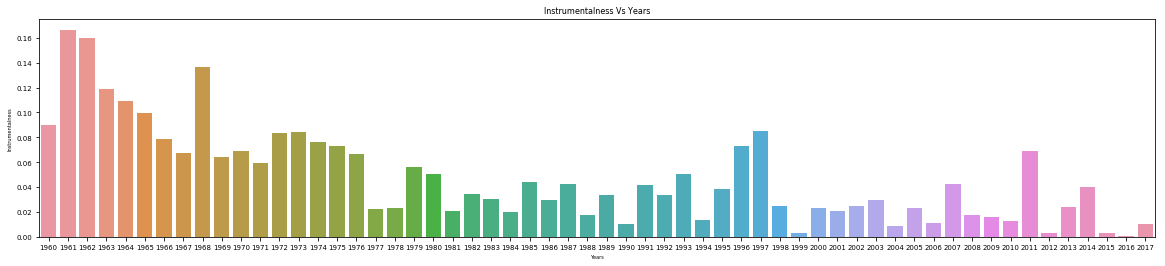

In [13]:
# data = pd.read_excel("spotify_project_final.xlsx")

# Create a zeros array to store averages later 
a=np.zeros((14,58))
data_in = data_sp[data_sp["Instrumentalness"] !=0]
# print(len(data_in))
df_i = pd.DataFrame(data_in[data_in['Year']==1960].mean())
means_in = pd.DataFrame(a, columns=range(1960,2018))

for year in range(1960,2018):
    df_i= pd.DataFrame(data_in[data_in['Year']==year].mean())
    for i in range(0,16):
        means_in.ix[i,year]=df_i.ix[i,0]
means_in=means_in.drop([0])

indexxx=df_i.index.values
newindex = list(filter(lambda x : x != 'Year', indexxx))

means_in.index=newindex



y=list(pd.Series(means_in.ix['Instrumentalness',:]))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5}) 
plt.figure(figsize=(20,4))
sns.barplot(x,y, ci=1)
plt.title('Instrumentalness Vs Years')
plt.xlabel('Years')
plt.ylabel('Instrumentalness')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Liveness')

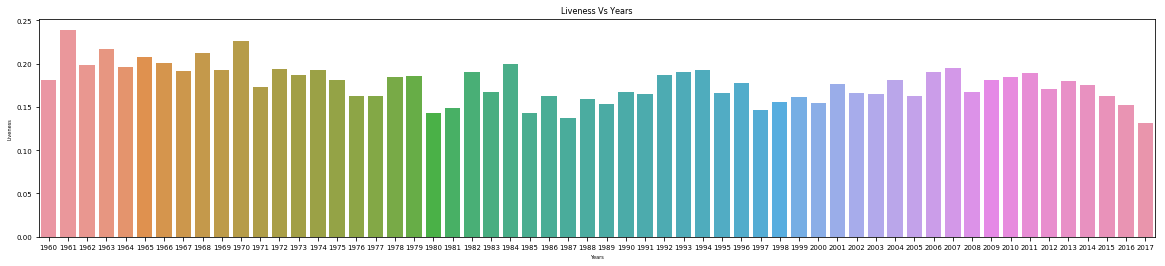

In [14]:
y=list(pd.Series(means.ix['Liveness',:]))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5}) 
plt.figure(figsize=(20,4))
sns.barplot(x,y, ci=1)
plt.title('Liveness Vs Years')
plt.xlabel('Years')
plt.ylabel('Liveness')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Valence')

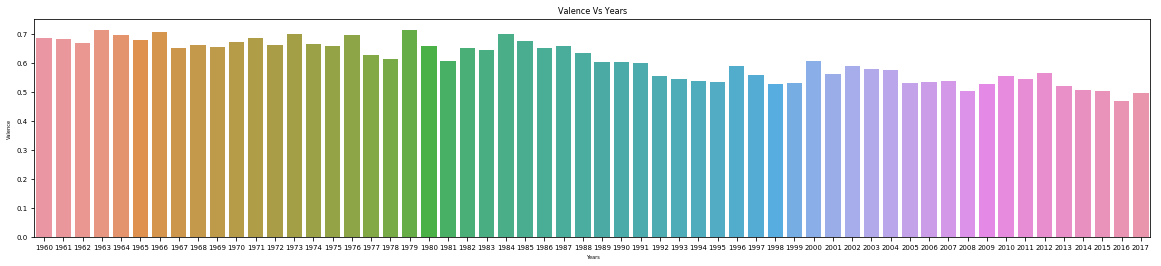

In [15]:
y=list(pd.Series(means.ix['Valence',:]))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5}) 
plt.figure(figsize=(20,4))
sns.barplot(x,y, ci=1)
plt.title('Valence Vs Years')
plt.xlabel('Years')
plt.ylabel('Valence')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Speechiness')

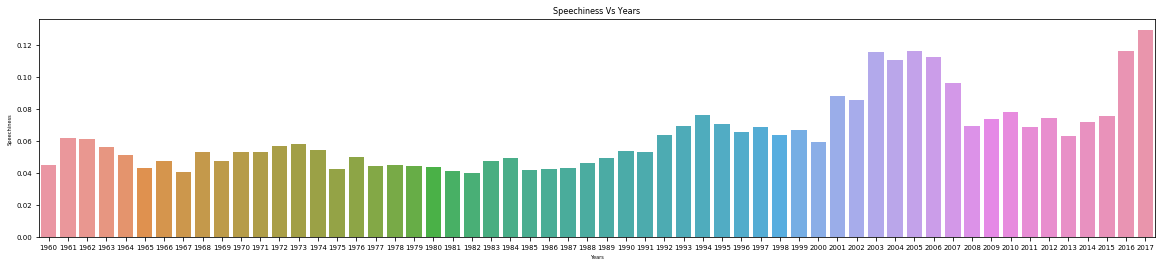

In [16]:
y=list(pd.Series(means.ix['Speechiness',:]))
sns.set_context(rc={"font.size":7,"axes.titlesize":8,"axes.labelsize":5}) 
plt.figure(figsize=(20,4))
sns.barplot(x,y, ci=1)
plt.title('Speechiness Vs Years')
plt.xlabel('Years')
plt.ylabel('Speechiness')

In [23]:
x = data_sp[data_sp["main_genre"] !=0]
x.groupby(["Year","main_genre"]).size()

Year  main_genre
1960  blues          1
      jazz           8
      rock          19
      swing          6
1961  blues          3
      jazz           7
      rock          13
      soul           1
      swing          7
1962  blues          1
      jazz           3
      rock          20
      soul           2
      swing          5
1963  blues          2
      jazz           7
      rock          11
      soul           2
      swing          4
1964  blues          3
      jazz           6
      rock          12
      soul           1
      swing          2
1965  blues          1
      disco          1
      jazz           5
      rnb            3
      rock          14
      swing          1
                    ..
2009  rock          35
      soul          15
2010  country        1
      disco          2
      folk           1
      rock          30
      soul           4
2011  disco          1
      rock          33
      soul           4
2012  disco          2
      rock       

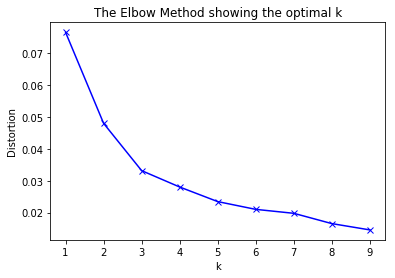

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature
Year,,,,,,,,,,,,,
1960,0.466,0.3890,5,-12.825,1,0.0253,0.631,0.843000,0.295,0.749,92.631,144893,4
1960,0.554,0.1860,1,-15.846,1,0.0379,0.909,0.001440,0.110,0.200,81.181,138640,3
1960,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,144013,4
1960,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4
1960,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,159893,4


In [98]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np


indexed_df = data.set_index(["Year"])

x2 = data['Speechiness']
x1 = data['Instrumentalness']


X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

indexed_df.iloc[:5,2:-3]


In [99]:
kmeans = KMeans(n_clusters=2).fit(indexed_df.iloc[:,2:-3])

In [100]:
# print(train.iloc[np.where(kmeans.labels_ == 0)[0]]['Country'].unique())
indexed_df["cluster"]=kmeans.labels_


In [101]:
indexed_df=indexed_df.reset_index()
# indexed_df.head()

,Year,Artist,Track,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature,Track_Popularity,Artist_Popularity,main_genre,cluster
0,1960,Percy Faith,Theme from A Summer Place,0.466,0.3890,5,-12.825,1,0.0253,0.631,0.843000,0.295,0.749,92.631,144893,4,52,50,NaN,1
1,1960,Jim Reeves,Hell Have to Go,0.554,0.1860,1,-15.846,1,0.0379,0.909,0.001440,0.110,0.200,81.181,138640,3,58,58,jazz,1
2,1960,The Everly Brothers,Cathys Clown,0.498,0.5820,7,-8.961,1,0.0339,0.412,0.000000,0.372,0.866,119.809,144013,4,51,61,NaN,1
3,1960,Johnny Preston,Running Bear,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,39,34,NaN,1
4,1960,Mark Dinning,Teen Angel,0.570,0.0636,0,-18.548,1,0.0459,0.936,0.000000,0.122,0.282,101.517,159893,4,22,22,NaN,1


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x288 with 0 Axes>

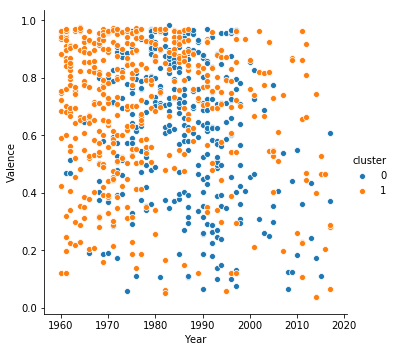

In [146]:
indexed_df.groupby("Year").mean()
indexed_df1= indexed_df[(indexed_df["Instrumentalness"] >0.004) & (indexed_df["Speechiness"]>0.005)]

# indexed_df1 = indexed_df[indexed_df["Instrumentalness"]>0.3]
plt.figure(figsize=(20,4))
sns.pairplot(x_vars=["Year"], y_vars=["Valence"], data=indexed_df1, hue="cluster", size=5)


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


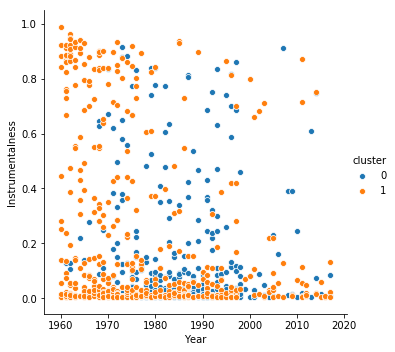

In [147]:
sns.pairplot(x_vars=["Year"], y_vars=["Instrumentalness"], data=indexed_df1, hue="cluster", size=5)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


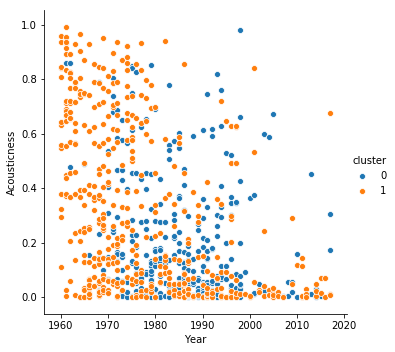

In [148]:
sns.pairplot(x_vars=["Year"], y_vars=["Acousticness"], data=indexed_df1, hue="cluster", size=5)